In [32]:
from nearline_helpers import *

In [33]:
import ROOT as r
import sys
import os

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
r.gSystem.Load("../lib/libdataProducts.so")
r.gSystem.Load("../lib/libunpackers.so")

1

In [36]:
# f = r.TFile("~/nearline_hists_run00207_00000.root")
# f = r.TFile("../bin/run00207_00000.mid.root")
# f = r.TFile("../bin/run0024_00000.mid.root")
# f = r.TFile("../bin/run00299_00005.mid.root")
f = r.TFile("../bin/run00316_00000.mid.root")
# f.ls()

# infiles = 

In [37]:
f.ls()

TFile**		../bin/run00316_00000.mid.root	
 TFile*		../bin/run00316_00000.mid.root	
  KEY: TProcessID	ProcessID0;1	0507622e-7517-11ee-9f8f-42d716acbeef
  KEY: dataProducts::HistogramMaker	h;1	
  KEY: TDirectoryFile	hists;1	hists
  KEY: TTree	tree;1	tree


In [38]:
t = f.Get('tree')
t.Print()

******************************************************************************
*Tree    :tree      : tree                                                   *
*Entries :      392 : Total =        13784711 bytes  File  Size =    5598847 *
*        :          : Tree compression factor =   2.45                       *
******************************************************************************
*Br    0 :waveforms_raw : Int_t waveforms_raw_                               *
*Entries :      392 : Total  Size=      20925 bytes  File Size  =        660 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   4.88     *
*............................................................................*
*Br    1 :waveforms_raw.fUniqueID : UInt_t fUniqueID[waveforms_raw_]         *
*Entries :      392 : Total  Size=      17959 bytes  File Size  =       7160 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   2.42     *
*...................................................

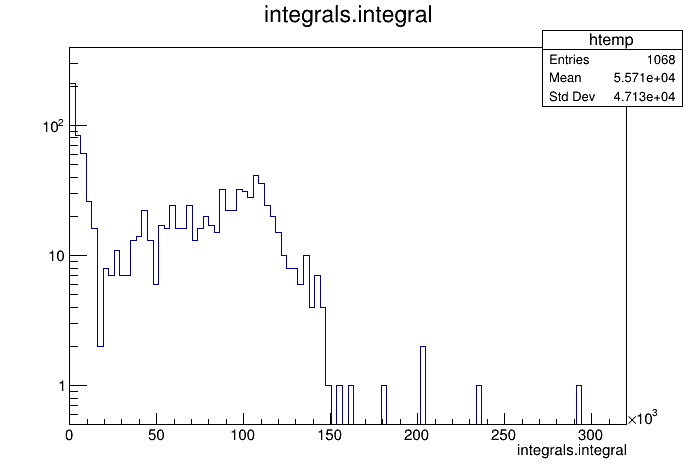

In [39]:
c = r.TCanvas()
t.Draw("integrals.integral")
c.SetLogy()
c.Draw()

In [40]:
t.GetEntry(0)

34157

In [41]:
integrals = t.integrals
len(integrals)

2

In [42]:
from nearline_helpers import *

(<Figure size 640x480 with 1 Axes>, <Axes: >)

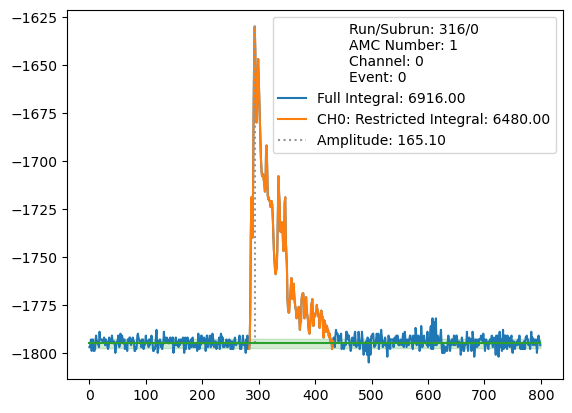

In [43]:
plot_integral(integrals[0])

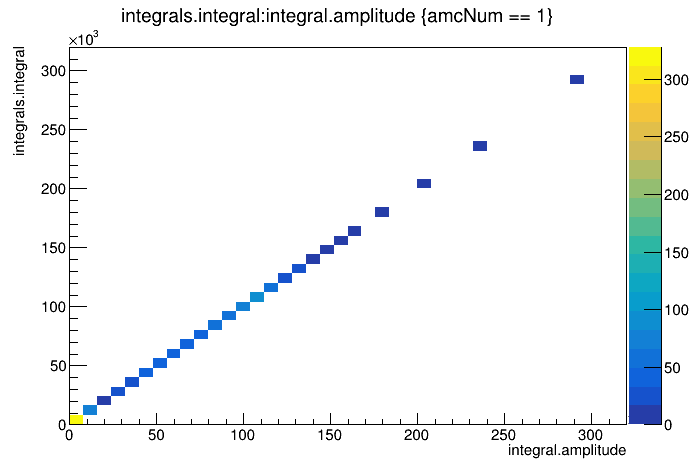

In [44]:
c = r.TCanvas()
t.Draw("integrals.integral:integral.amplitude","amcNum == 1","colz")
c.Draw()

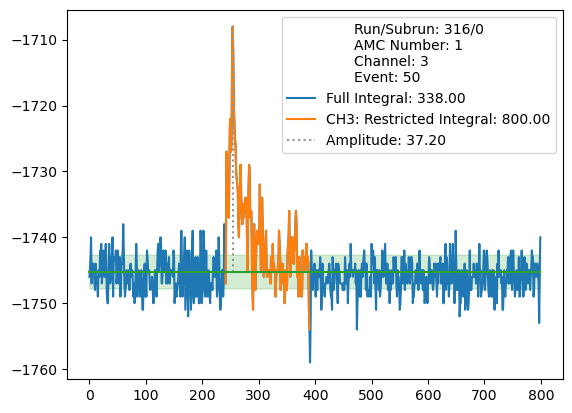

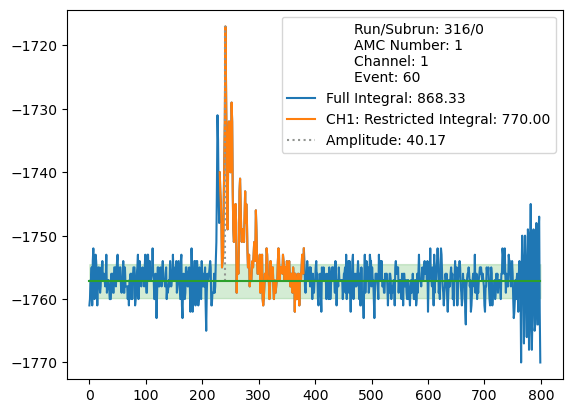

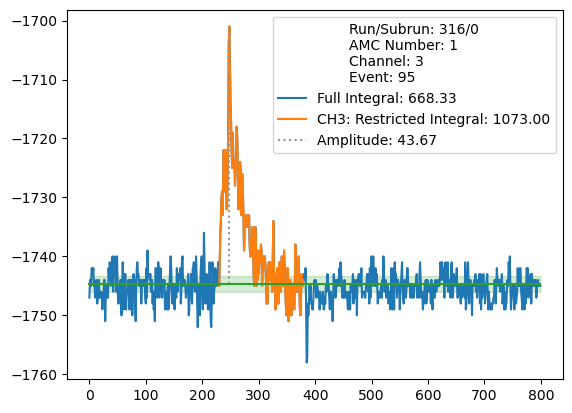

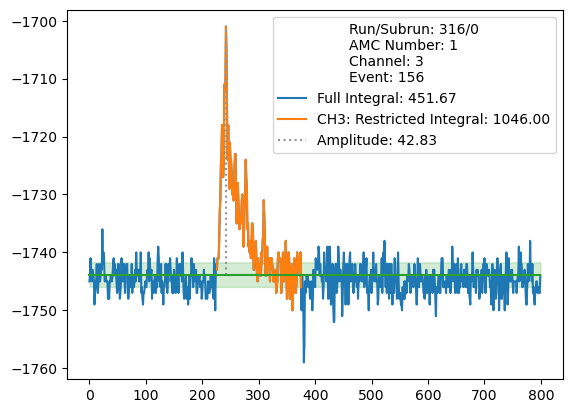

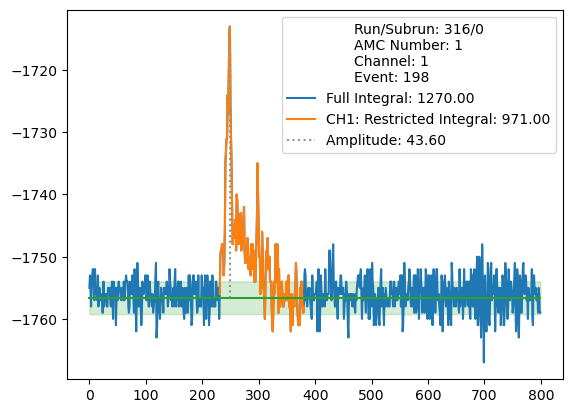

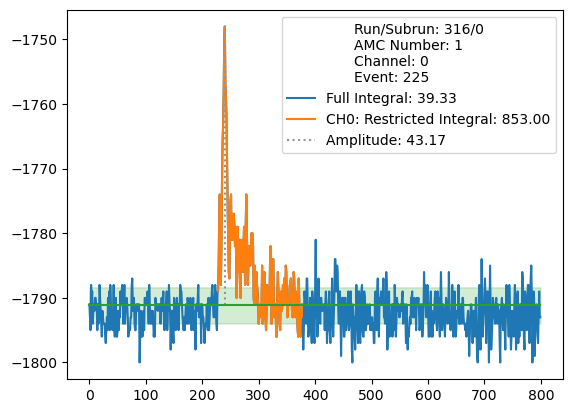

In [45]:
counter = 0
e1 = 100
e2 = e1+1000
for i, e in enumerate(t):
    for wf in e.integrals:
        if wf.integral > e1 and wf.integral < e2:
            plot_integral(wf)
            plt.show()
            counter += 1
        if(counter > 10):
            break
    if(counter > 10):
        break


In [ ]:
t.GetEntry(0)

In [ ]:
w = t.GetBranch("waveforms")

In [ ]:
c = t.waveforms[0].DrawWaveform(t.waveforms[0].MakeTGraph())
c.Draw()

In [ ]:
t.waveforms[0].trace

In [ ]:
t.waveforms[0].PeakToPeak()

In [ ]:
for x in t.waveforms:
    print(
        x.PeakToPeak(),
        np.amax(x.trace),np.amin(x.trace),
        np.amax(x.trace)-np.amin(x.trace)
    )

In [ ]:
plt.plot(t.waveforms[0].trace)

In [ ]:
np.amax(t.waveforms[0].trace)-np.amin(t.waveforms[0].trace)

In [ ]:
t.waveforms[0].length

In [ ]:
t.waveforms[0].Show()

In [ ]:
t.GetEntries()

In [ ]:
# for i in range(5):
for i in range(t.GetEntries()):
    t.GetEntry(i)
    for w in t.integrals:
        x = w.raw.GetObject()
        ding = np.array(x.trace, dtype=np.short)

        base = np.average(ding[:10])
        if np.amax(ding) > base + 15:
            print(x)
            print(base, np.amax(ding))
            label=f'{x.crateNum=}\n{x.amcNum=}\n{x.channelTag=}\n{x.eventNum=}\n{w.fullintegral=}\n{x.pedestalLevel=}\n{x.pedestalStdev=}'
            plt.plot(ding,label=label)

            # c = x.DrawWaveform(x.MakeTGraph())
            # c.Draw()

            plt.legend()
            plt.show()
            # break 
    break

In [ ]:
t.Draw("integrals.fullintegral:integrals.channelTag","","colz")
c.Draw()

In [ ]:
def tmp():
    for e in t:
        for w in t.integrals:
            if w.fullintegral < -1000:
                draw_waveform(w)
                plt.show()
                return w
w = tmp()
                # break

In [ ]:
trace = w.raw.GetObject().trace
np.sum(trace) - w.pedestalLevel*len(trace)

In [ ]:
np.average(trace[:15]), w.pedestalLevel

In [ ]:
ding = np.array(trace)-w.pedestalLevel
plt.hist(ding)

In [ ]:
for i in range(t.GetEntries()):
    t.GetEntry(i)
    for x in t.waveforms:
        ding = np.array(x.trace, dtype=np.short)

        base = np.average(ding[:10])
        # if np.amax(ding) > base + 20:
        print(x)
        print(base, np.amax(ding))
        label=f'{x.crateNum=}\n{x.amcNum=}\n{x.channelTag=}\n{x.eventNum=}'
        fig,ax = plt.subplots(1,2,figsize=(10,5))
        ax[0].plot(ding[:10],label=label)
        ax[1].plot(ding,label=label)
        ax[1].legend()
        plt.show()
        # break 
    break

In [ ]:
ding = np.array(t.waveforms[0].trace, dtype=np.short)
plt.plot(ding)

In [ ]:
t.waveform_integrals[0].integral

In [ ]:
t.waveforms[0].amcNum

In [ ]:
t.waveform_integrals[0]

In [ ]:
t.waveform_integrals[0].raw.GetObject()

In [ ]:
t.waveform_integrals[0].raw.GetObject().amcNum

In [ ]:
ding = r.dataProducts.WaveformIntegral(t.waveforms[0])

In [ ]:
ding

In [ ]:
ding.integral